<a href="https://colab.research.google.com/github/fahriyegrl/logistic_regression_and_support_vector_classifiers/blob/main/logistic_regression_and_support_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to a percentage.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

In [40]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, and reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets.

We will work with the first 'real' data sets in the next assignment.

**You may use ChatGPT or other LLMs to help with this assignment.** (Unless the question specifically requests it, the use of LLMs is **optional**.) However, if you do use an LLM to help with a particular question, you must submit a full transcript of all your interactions with the LLM in the form of screenshots embedded in the text cells provided. (Alternatively, if the LLM allows links to the transcripts to be shared, then you can place such links in the text cells instead. Please make sure that the links work!) You must also do this on your own &mdash; using the results of another person's LLM session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of the LLM's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

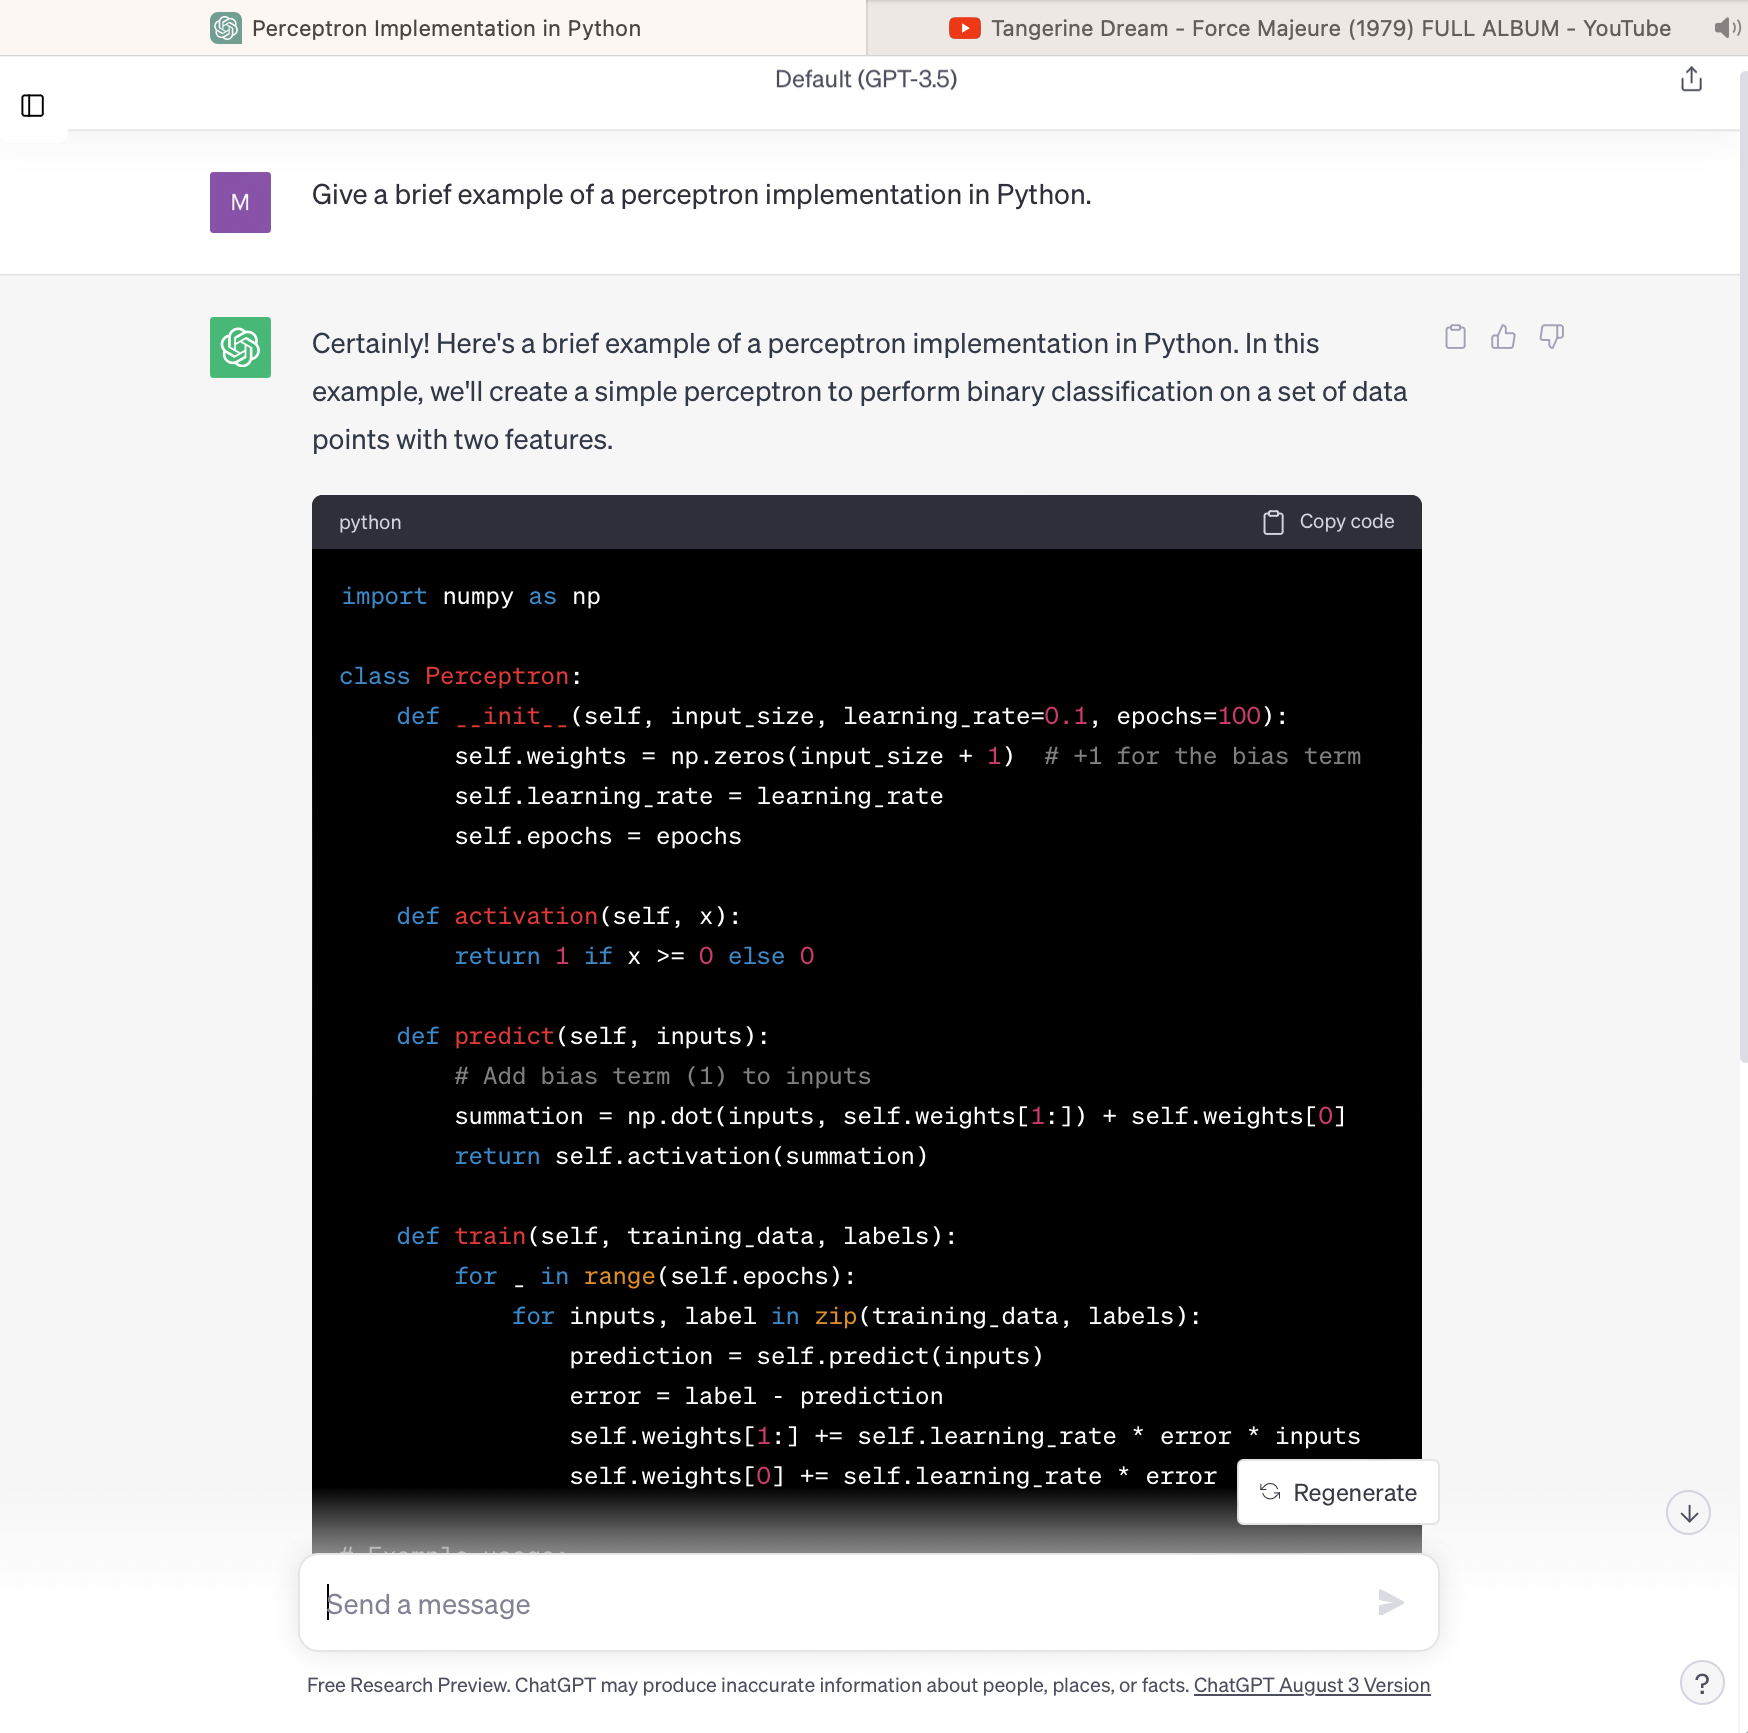

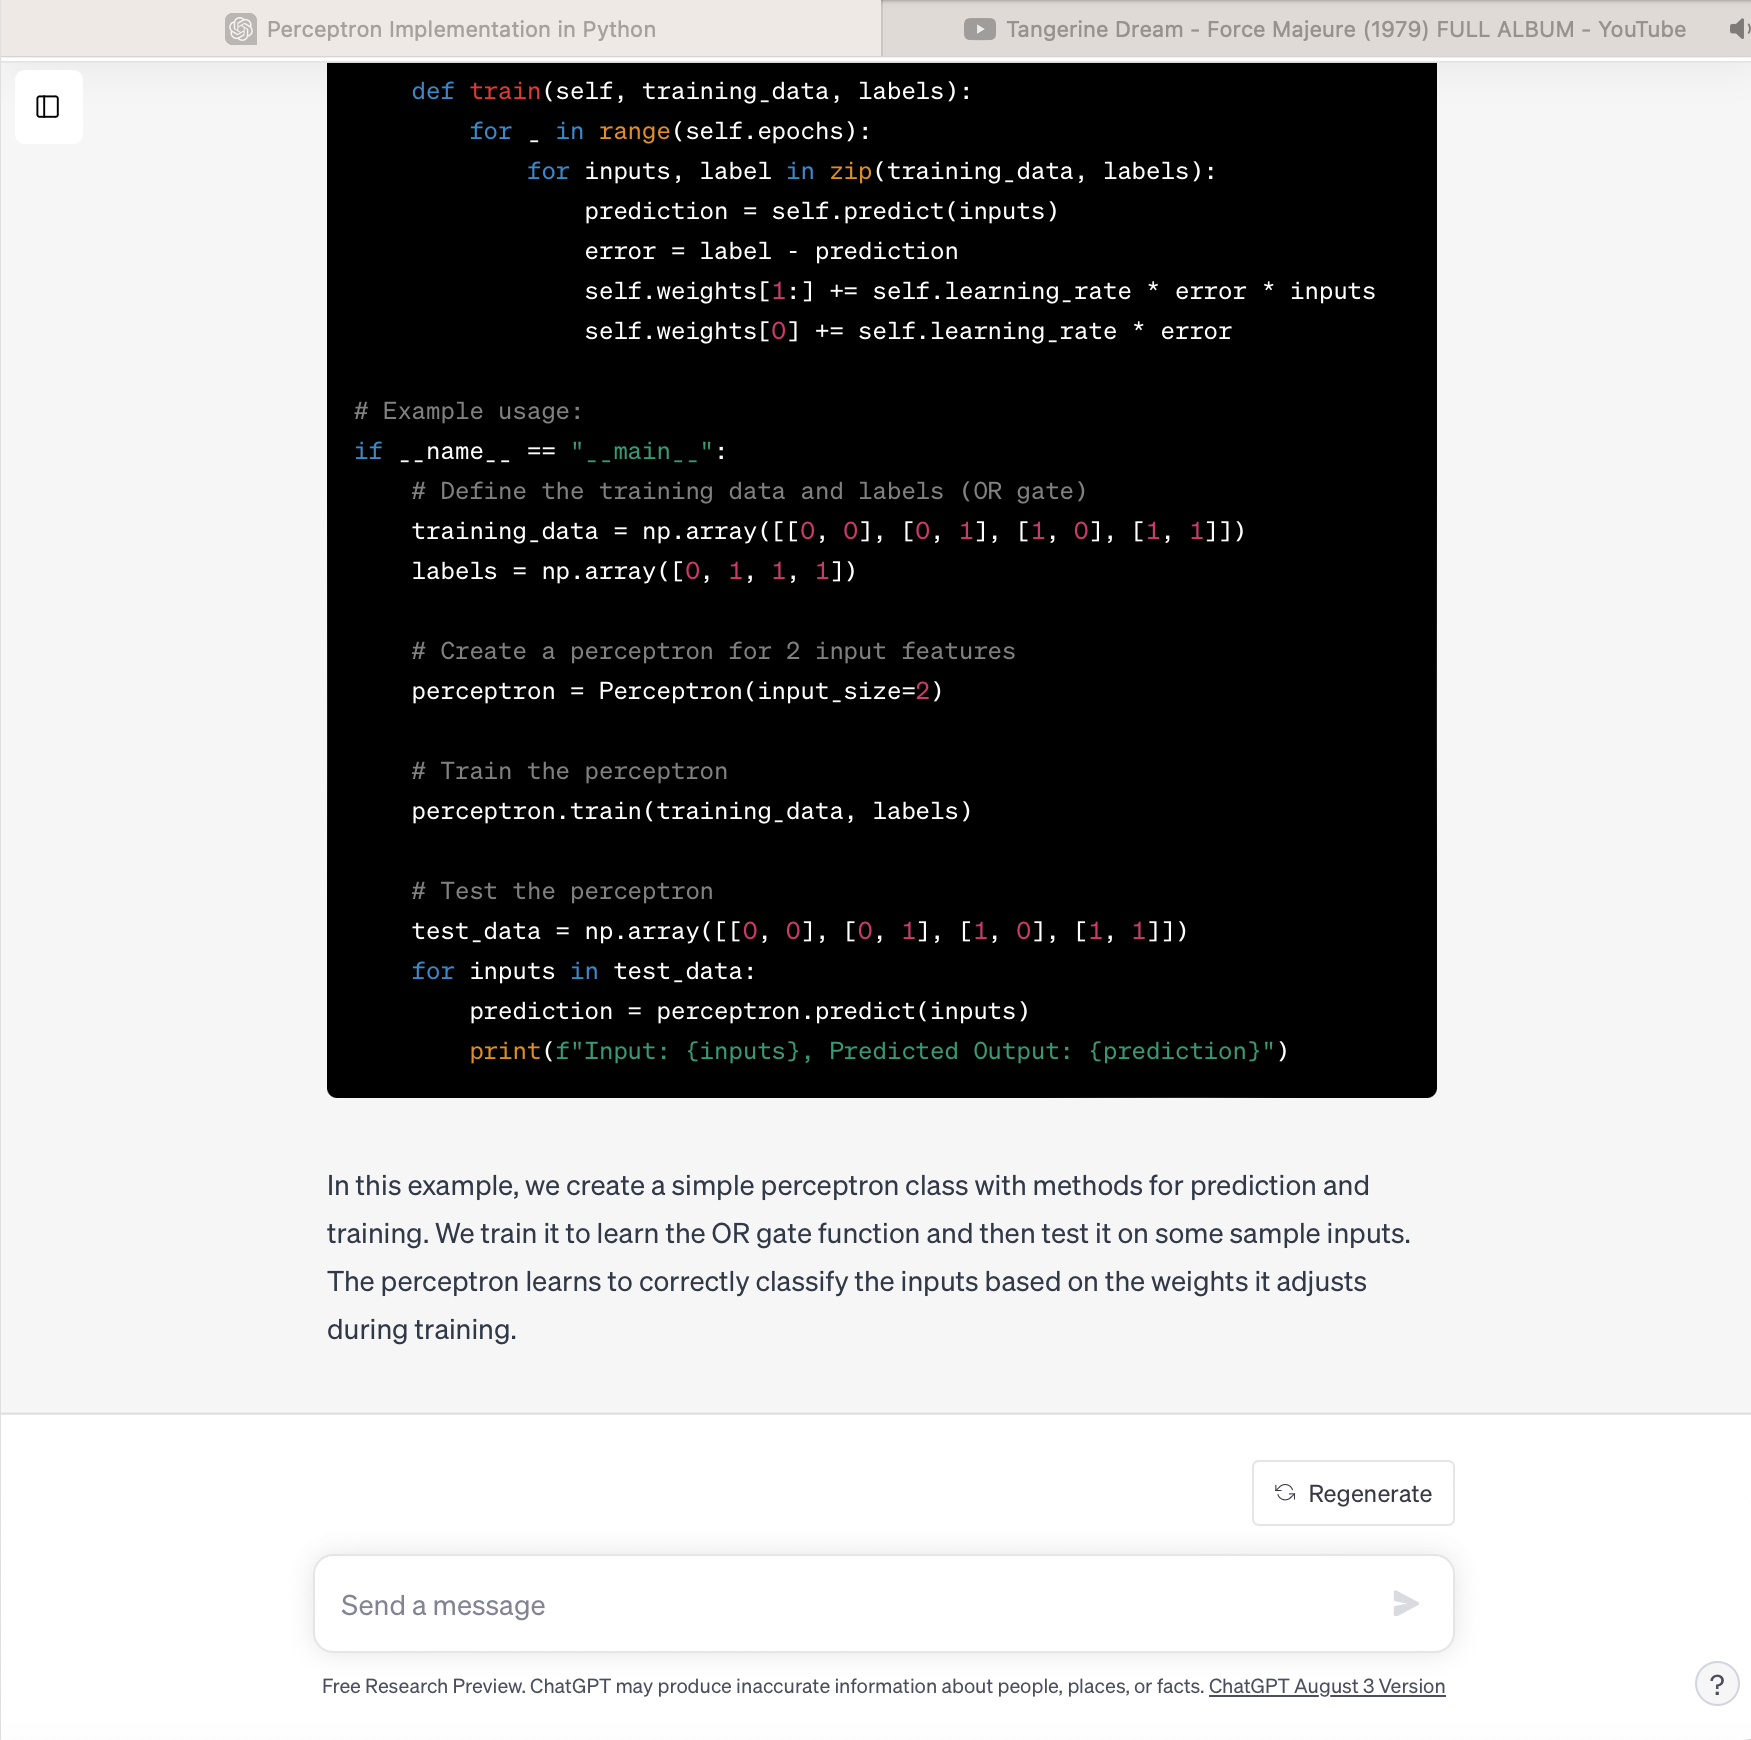

## **Preparation Steps**

In [41]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [42]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


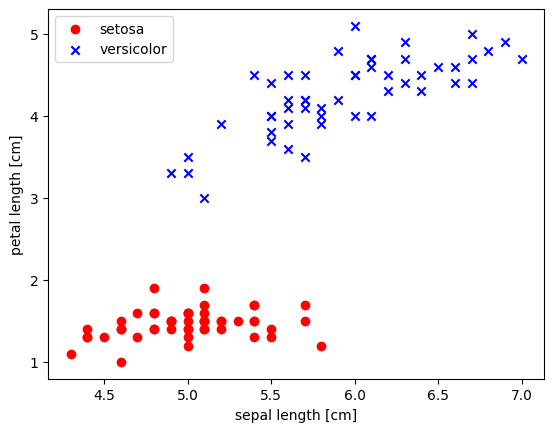

In [43]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [44]:
## practicing
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
## practicing
X.shape

(100, 2)

In [46]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    x2_min, x2_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

First, let's load a slightly modified version of the textbook's implementation of logistic regression with gradient descent.

In [47]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # Clip the values of 'output' to avoid divide-by-zero errors
            output = np.clip(output, 1e-10, 1 - 1e-10)

            # compute the logistic `loss`
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1).

In [48]:
X[0:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

Suppose the initial weights of the logistic neuron are w0 = 0.1, w1 = -0.3, w2 = 0.2.

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code for polynomial regression from the Regression Code Notebook, generate $X_{d=2}$ and $X_{d=3}$.

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD*, fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta \leq 0.001$ and $n_{\mathit{iter}} \geq 1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*. Explain why your program produces the loss values you observe.

<font color = 'blue'> **Q1-4**.  </font> Copy the code for our class *LogisticRegressionGD* into a new cell, and modify so that it uses L2 regularization. (**Note:** You will need to update the parameter weight update rule for gradient descent.) Give your copy the new name *LogisticRegressionGDwithReg*, and make sure that every new line of code you add is clearly commented.

<font color = 'blue'> **Q1-5**.  </font>
Redo Q1-3 using *LogisticRegressionGDwithReg* with $\lambda\in\{0.0, 0.1,\ldots, 0.9\}$, for the same input choices and hyperparameter choices from Q1-3. For each case, report the loss function value and the norm of the weight parameter vector. What trends do you observe?

In [49]:
# your calculations and code go here

In [50]:
#Q1-1. Write the weights after processing data points...........................

w0 = 0.1 #bias
w1 = -0.3
w2 = 0.2
n = 0.1 #learning rate
X0 = X[0]
X1 = X[1]
X2 = X[2]
y1= 1
y2= 1
y3= 1

In [51]:
X0[0], X0[1]

(5.1, 1.4)

In [52]:
# prediction for logistic regression
# data point X[0]:
z = w0 + w1*X0[0] + w2*X0[1]
prediction =  1 / (1 + np.exp(-z))   #sigmoid function
#prediction2 = 1. / (1. + np.exp(-np.clip(z, -250, 250))) #this is what the professor provided in the class
print(z , prediction)

#print(prediction2)
error = y1 - prediction
print(error)
#update weights
w0 = w0 + n*error
w1 = w1 + n*error*X0[0]
w2 = w2 + n*error*X0[1]
print(w0, w1, w2)

-1.1499999999999997 0.24048908305088898
0.759510916949111
0.1759510916949111 0.08735056764404658 0.30633152837287553


In [ ]:
# data point X[1]:
z = w0 + w1*X1[0] + w2*X1[1]
prediction =   1 / (1 + np.exp(-z))
print(z , prediction)
error = y2 - prediction
print(error)
#update weights
w0 = w0 + n*error
w1 = w1 + n*error*X1[0]
w2 = w2 + n*error*X1[1]
print(w0, w1, w2)

1.0328330128727652 0.737464765709884
0.26253523429011605
0.2022046151239227 0.21599283244620346 0.3430864611734918


In [ ]:
# data point X[2]:
z = w0 + w1*X2[0] + w2*X2[1]
prediction =   1 / (1 + np.exp(-z))
print(z , prediction)
error = y3 - prediction
print(error)
#update weigths
w0 = w0 + n*error
w1 = w1 + n*error*X2[0]
w2 = w2 + n*error*X2[1]
print(w0, w1, w2)

1.6633833271466185 0.840691651824108
0.159308348175892
0.2181354499415119 0.2908677560888727 0.3637965464363577


In [17]:
# This is for Q1-1 but I used the LogisticRegressionGD as the way the professor provided with a randon weights.
modelx = LogisticRegressionGD(eta=0.1, n_iter=3, random_state=1)
modelx.fit(X[0:3], y[0:3])
print(modelx.w_)

[0.17748579 0.78378205 0.21503369]


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [14]:
# # This is for Q1-1, checking my result with the class -LogisticRegressionGD but I need to modify the class because weights are created randomly.

class UppdatedLogisticRegressionGD(object):

    def __init__(self, eta=0.05, n_iter=100, random_state=1, weights =[0.1, -0.3, 0.2]):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.weights = weights

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        # rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights[1:] += self.eta * X.T.dot(errors)
            self.weights[0] += self.eta * errors.sum()

            # Clip the values of 'output' to avoid divide-by-zero errors
            output = np.clip(output, 1e-10, 1 - 1e-10)

            # compute the logistic `loss`
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)




In [18]:
X = np.array([[5.1, 1.4],
              [4.9, 1.4],
              [4.7, 1.3]])
y = np.array([1, 1, 1])

model = UppdatedLogisticRegressionGD(eta=0.1, n_iter=100, random_state=1)
model.fit(X, y)
#print(model.loss_)
print(model.weights)


[0.43401366796759544, 1.3335255258849734, 0.6556239990929326]


In [23]:
# Q1-2. Given our data  X , let  Xd=2  and  Xd=3  be the quadratic and cubic features.............

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[5.1, 1.4],
              [4.9, 1.4],
              [4.7, 1.3]])


polynomial2 = PolynomialFeatures(degree=2)
X_quadratic = polynomial2.fit_transform(X)

polynomial3 = PolynomialFeatures(degree=3)
X_cubic = polynomial3.fit_transform(X)

print("Original Features:\n", X)
print("\nQuadratic Features (Xd=2):\n", X_quadratic)
print("\nCubic Features (Xd=3):\n", X_cubic)

Original Features:
 [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]

Quadratic Features (Xd=2):
 [[ 1.    5.1   1.4  26.01  7.14  1.96]
 [ 1.    4.9   1.4  24.01  6.86  1.96]
 [ 1.    4.7   1.3  22.09  6.11  1.69]]

Cubic Features (Xd=3):
 [[  1.      5.1     1.4    26.01    7.14    1.96  132.651  36.414   9.996
    2.744]
 [  1.      4.9     1.4    24.01    6.86    1.96  117.649  33.614   9.604
    2.744]
 [  1.      4.7     1.3    22.09    6.11    1.69  103.823  28.717   7.943
    2.197]]


In [28]:
#Q1-3. Using LogisticRegressionGD, fit  X ,  Xd=2  and  Xd=3 . Here .....................

model_1 = LogisticRegressionGD(eta=0.001, n_iter=1000, random_state=1)
model_1.fit(X, y)
print(model_1.loss_[-1])
print("----------------------------------")
print(model_1.w_)

0.03882647300268207
----------------------------------
[0.17923996 0.79089206 0.21704577]


In [31]:
model_2 = LogisticRegressionGD(eta=0.001, n_iter=1000, random_state=1)
model_2.fit(X_quadratic, y)
print(model_2.loss_[-1])
print("----------------------------------")
print(model_2.w_)

0.0016149705546746758
----------------------------------
[0.02802741 0.0056664  0.05201293 0.00525573 0.28752909 0.0547901
 0.03916192]


In [32]:
model_3 = LogisticRegressionGD(eta=0.001, n_iter=1000, random_state=1)
model_3.fit(X_cubic, y)
print(model_3.loss_[-1])
print("----------------------------------")
print(model_3.w_)

3.000000248371113e-10
----------------------------------
[ 0.01826265 -0.00409837  0.00462026 -0.00796818  0.05726644 -0.00945983
  0.02122926  0.23130697  0.06980385  0.01608472  0.01980422]


The loss function that I got from X data, X_quadratic and X_cubic differ from eachother. The reasons might be:
- For normal data, the loss is higher than other due to linear separability.
- For quadratic data, the loss is decresing more than normal loss due to the data has non-linear relationship.
- For cubic data. the loss is the lowest due to cubic pattern can catch better the more complexity in data.

In [34]:
# Q1-4. Copy the code for our class LogisticRegressionGD into a new ce....................

class LogisticRegressionGDwithReg(object):
    """Logistic Regression Classifier using gradient descent with L2.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    reg : float
      Reqularization value (default is 0.0 for none)


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1, reg=0.0): # I added a new parameter for regularization and added description above.
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.reg = reg

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)


            # I updated the weight formula here by addidng the reg:

            self.w_[1:] += self.eta * (X.T.dot(errors) - self.reg * self.w_[1:])
            self.w_[0] += self.eta * errors.sum()

            # Clip the values of 'output' to avoid divide-by-zero errors
            output = np.clip(output, 1e-10, 1 - 1e-10)

            # compute the logistic `loss`
            # and I added the reg to the loss function:


            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) + (self.reg/2) * np.sum(self.w_[1:] ** 2)
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [35]:
# Q1-5. Redo Q1-3 using LogisticRegressionGDwithReg wi............

X, X_quadratic, X_cubic

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3]]),
 array([[ 1.  ,  5.1 ,  1.4 , 26.01,  7.14,  1.96],
        [ 1.  ,  4.9 ,  1.4 , 24.01,  6.86,  1.96],
        [ 1.  ,  4.7 ,  1.3 , 22.09,  6.11,  1.69]]),
 array([[  1.   ,   5.1  ,   1.4  ,  26.01 ,   7.14 ,   1.96 , 132.651,
          36.414,   9.996,   2.744],
        [  1.   ,   4.9  ,   1.4  ,  24.01 ,   6.86 ,   1.96 , 117.649,
          33.614,   9.604,   2.744],
        [  1.   ,   4.7  ,   1.3  ,  22.09 ,   6.11 ,   1.69 , 103.823,
          28.717,   7.943,   2.197]]))

In [36]:
regular_values = np.arange(0.0, 1.0, 0.1)
results = []

for regular_value in regular_values:
  model_with_original_data = LogisticRegressionGDwithReg(eta=0.001, n_iter=100, random_state=1, reg= regular_value)
  model_with_original_data.fit(X, y)


  model_with_quadratic_data = LogisticRegressionGDwithReg(eta=0.001, n_iter=100, random_state=1, reg= regular_value)
  model_with_quadratic_data.fit(X_quadratic, y)


  model_with_cubic_data = LogisticRegressionGDwithReg(eta=0.001, n_iter=100, random_state=1, reg= regular_value)
  model_with_cubic_data.fit(X_cubic, y)

  results.append({
    "regularization" :   regular_value,
    "loss_original_data" : model_with_original_data.loss_[-1],
    "weight_original_data" : model_with_original_data.w_,
    "loss_quadratic_data" : model_with_quadratic_data.loss_[-1],
    "weight_quadratic_data" : model_with_quadratic_data.w_,
    "loss_cubic_data" : model_with_cubic_data.loss_[-1],
    "weight_cubic_data" : model_with_cubic_data.w_
  })

for result in results:
  print(f"Lambda: {result['regularization']}, "
          f"Loss (Original): {result['loss_original_data']}, Weight (Original): {result['weight_original_data']}, "
          f"Loss (Quadratic): {result['weight_original_data']}, Weight (Quadratic): {result['weight_quadratic_data']}, "
          f"Loss (Cubic): {result['loss_cubic_data']}, Weight (Cubic): {result['weight_cubic_data']}")




Lambda: 0.0, Loss (Original): 0.39898550810777766, Weight (Original): [0.09007114 0.35535659 0.09554393], Loss (Quadratic): [0.09007114 0.35535659 0.09554393], Weight (Quadratic): [0.02434801 0.001987   0.03422553 0.00029292 0.2014526  0.03077302
 0.03245886], Loss (Cubic): 3.000000248371113e-10, Weight (Cubic): [ 0.01826265 -0.00409837  0.00462026 -0.00796818  0.05726644 -0.00945983
  0.02122926  0.23130697  0.06980385  0.01608472  0.01980422]
Lambda: 0.1, Loss (Original): 0.408604578053687, Weight (Original): [0.09019807 0.35383003 0.09515371], Loss (Quadratic): [0.09019807 0.35383003 0.09515371], Weight (Quadratic): [0.02437676 0.00201155 0.03410046 0.00035014 0.20049675 0.03075944
 0.03221755], Loss (Cubic): 0.0030856764442558715, Weight (Cubic): [ 0.01826265 -0.00405739  0.00457526 -0.00788861  0.05670141 -0.00936435
  0.02101839  0.22902897  0.06911585  0.01592651  0.01960767]
Lambda: 0.2, Loss (Original): 0.41810844245840534, Weight (Original): [0.09032481 0.35231421 0.09476613]

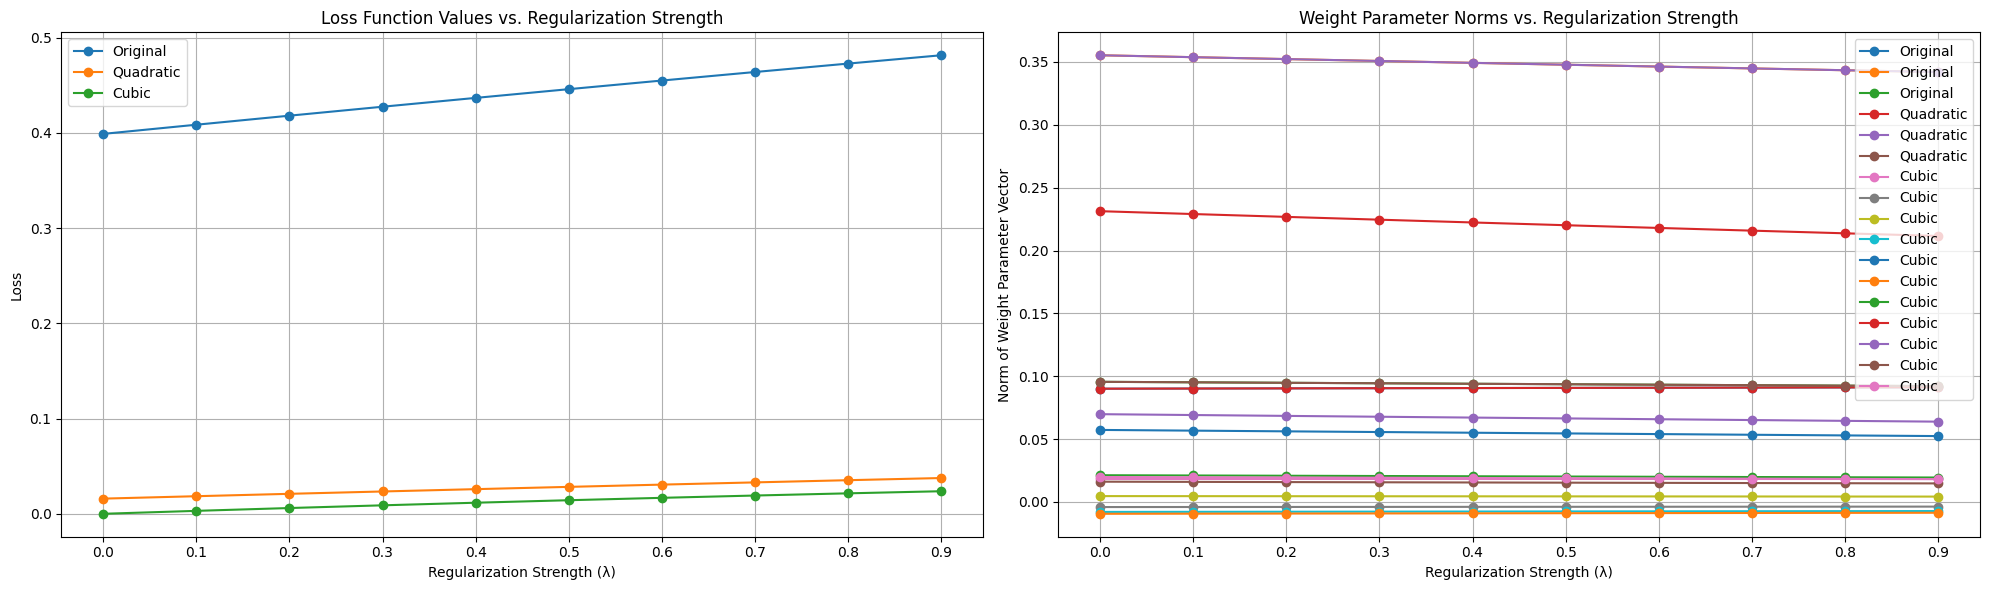

In [37]:
import matplotlib.pyplot as plt
reg = [result['regularization'] for result in results]
loss_original = [result['loss_original_data'] for result in results]
weight_original = [result['weight_original_data'] for result in results]
loss_quadratic = [result['loss_quadratic_data'] for result in results]
weight_quadratic = [result['weight_quadratic_data'] for result in results]
loss_cubic = [result['loss_cubic_data'] for result in results]
weight_cubic = [result['weight_cubic_data'] for result in results]



# Plot Loss Values
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(reg, loss_original, marker='o', label='Original')
plt.plot(reg, loss_quadratic, marker='o', label='Quadratic')
plt.plot(reg, loss_cubic, marker='o', label='Cubic')
plt.title('Loss Function Values vs. Regularization Strength')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Loss')
plt.xticks(reg)
plt.legend()
plt.grid()

# Plot Norms of Weight Parameter Vector
plt.subplot(1, 2, 2)
plt.plot(reg, weight_original, marker='o', label='Original')
plt.plot(reg, weight_original, marker='o', label='Quadratic')
plt.plot(reg, weight_cubic, marker='o', label='Cubic')
plt.title('Weight Parameter Norms vs. Regularization Strength')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Norm of Weight Parameter Vector')
plt.xticks(reg)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

####The LLM that I used are listed below. And the articles I read are listed below:
https://medium.com/analytics-vidhya/a-comprehensive-guide-to-logistic-regression-e0cf04fe738c#:~:text=%E2%80%98Logistic%20Regression%E2%80%99%20is%20an%20extremely

https://sankarsivasamy.medium.com/explaining-logistic-regression-a-comprehensive-guide-e0a91b2b400e#:~:text=Logistic%20regression%20models%20the




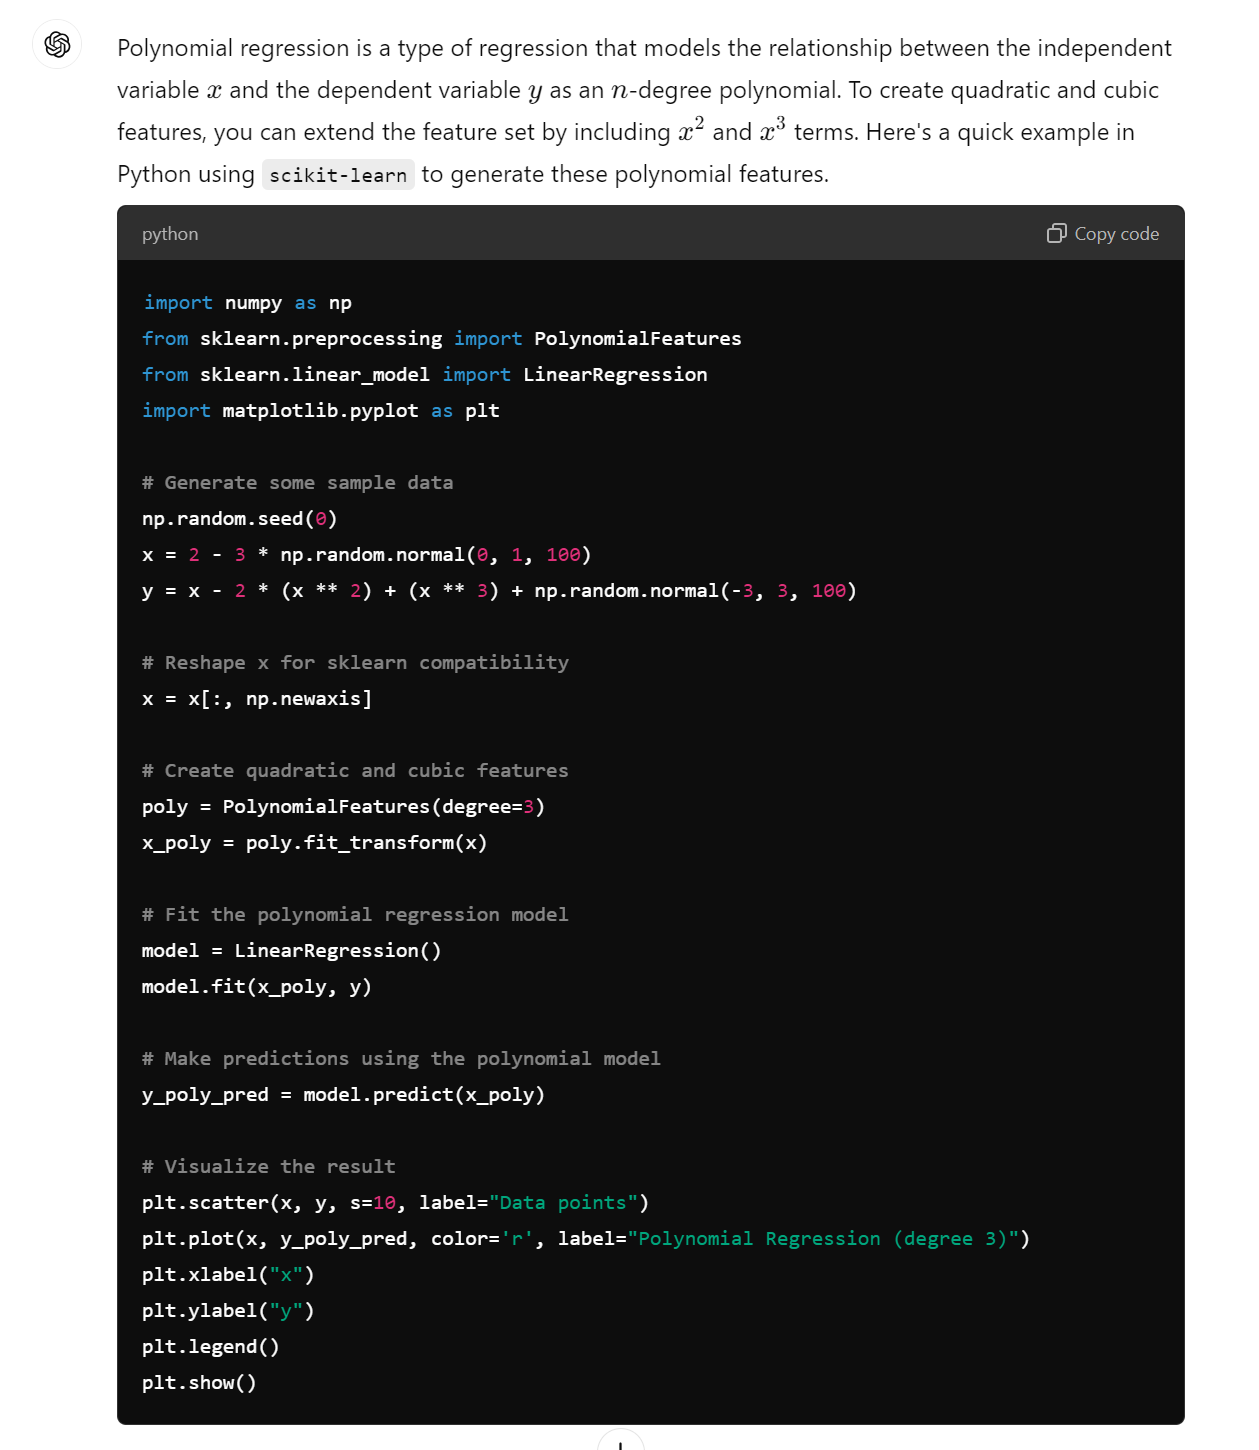

In [ ]:
# Grader's area

maxScore = maxScore +4
#M[1,1] =

maxScore = maxScore +4
#M[1,2] =

maxScore = maxScore +4
#M[1,3] =

maxScore = maxScore +4
#M[1,4] =

maxScore = maxScore +4
#M[1,5] =

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question Q1-3.

<br>

Suppose that $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$, where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be less than or equal to the loss obtained by $f_1$. Try to come up with a solid mathematical argument that justifies this claim, for the setting in Q1-3. [**Note:** as with anything else, feel free to discuss this on Canvas.]

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

(your answer goes here)

The explaination in the Question 2 in the previosu cell is what I observed in the Q1-3. The loss I got from X-quadratic is less than the loss of the X-original.

X-quadratic data has more complex pattern than X-original. When we tranform the original data to quadratic, it dimentionality increases.
If X has 2 features, X-quadractic has 6 at least. This increase in the data helps for a better result on target.

And f2 is trained on a richer data as the feature increases, the loss result will be lesser.


In [ ]:
# Grader's area

maxScore = maxScore + 4
#M[2,1] =


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVC guarantees that when the dataset is linearly separable, SVC will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **no**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br>

**a.** the data set is linearly separable, and  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes - that is, it has a very big margin with respect to one of the two classes, and a very small margin with respect to the other class.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the Iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from Question 1. <br>
<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair.

**Hint**: Try small datasets. <br>
**Note**: It's best to use fresh variables for your dataset, since the previous values of $X,y$ will be reused in Question 4.


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# your answers go here

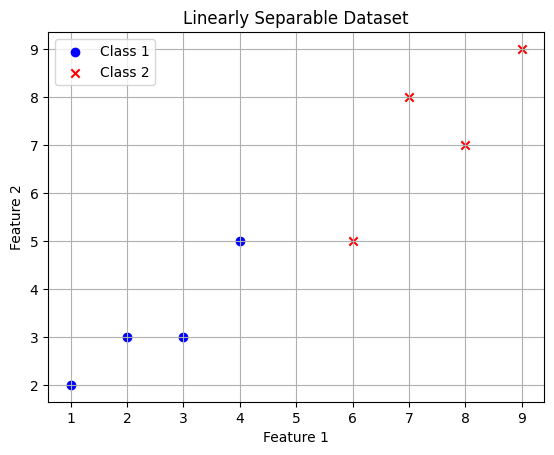

In [62]:
####  Q3-1

# I created a small datasets
X_class1 = np.array([[1, 2], [2, 3], [3, 3], [4, 5]])
X_class2 = np.array([[6, 5], [7, 8], [8, 7], [9, 9]])


X = np.vstack((X_class1, X_class2))
y = np.array([0] * len(X_class1) + [1] * len(X_class2))  # Labels: 0 for class1, 1 for class2

# Plotting the data set
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue',marker='o', label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='red', marker='x', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
####  Q3-2

model_Q3_2 =LogisticRegressionGD(eta=0.05, n_iter=100, random_state=1)
model_Q3_2.fit(X, y)
print(model_Q3_2.loss_)
print("----------------------------------")
print(model_Q3_2.w_)

[5.65121967000256, 11.2084698979744, 7.172684056399179, 18.646646522046673, 5.897440904248285, 10.911062301751835, 23.470992491483383, 9.922982049453035, 4.771763499703342, 12.272079491837783, 3.0717541464732356, 3.01169388739816, 3.1175231558406904, 4.4677239809486355, 7.024298496518606, 18.31360543090596, 5.944491344512482, 4.816967651911447, 12.95994988990695, 2.877384357952113, 4.168910278465721, 10.734295886157415, 2.2108628002534116, 2.510568857248293, 4.171475824037904, 3.7274703444686894, 9.014592230383125, 1.8949654805826126, 1.887091149470555, 1.9270197076847875, 2.0751988287780465, 2.808118699431057, 2.9938732409401885, 6.283294400560087, 1.881745534605028, 2.313682822295829, 2.4994706650086376, 4.5221601778854, 2.131293983650605, 3.2878138249495885, 2.3217515269466285, 3.911674494285552, 2.0408798220981916, 3.0337214739612284, 2.1090221479655646, 3.241079384738596, 1.9709189294447131, 2.8399621876026218, 1.933862886263281, 2.737747754139049, 1.8603543336462862, 2.5414782442

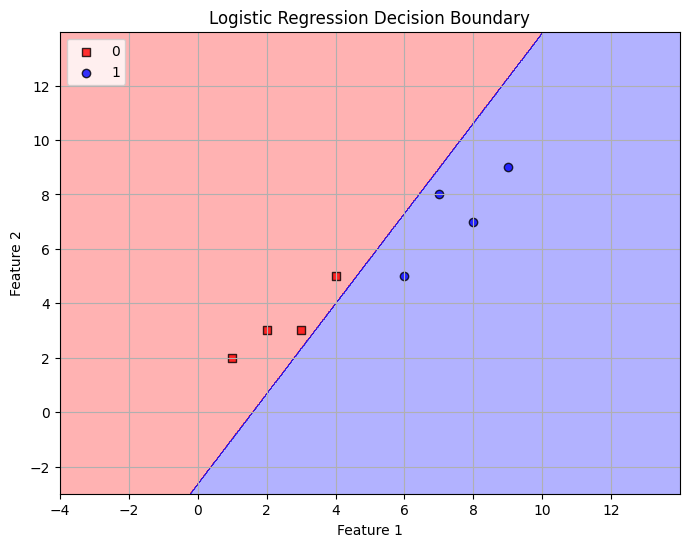

In [64]:
####  Q3-3
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, model_Q3_2)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[3,1] =
#M[3,2] =
#M[3,3] =


<font color = 'blue'> **Q3-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

In [ ]:
# your answer goes here

In [79]:
X,y

(array([[0.2 , 0.2 ],
        [0.3 , 0.2 ],
        [0.25, 0.3 ],
        [0.2 , 0.25],
        [0.3 , 0.3 ]]),
 array([1, 1, 1, 0, 0]))

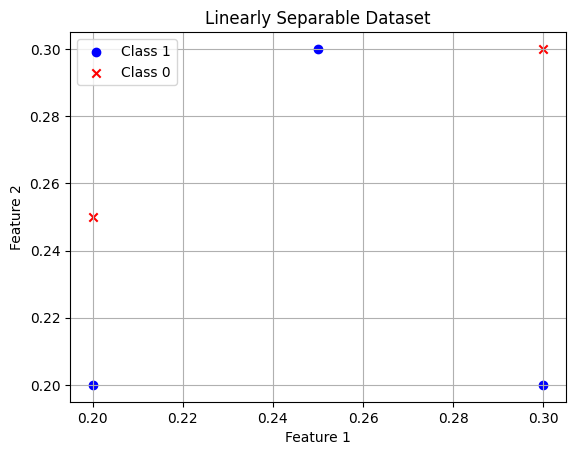

In [80]:
# Q3-4

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='x', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid()
plt.show()

In [81]:
from sklearn.linear_model import LogisticRegression

model_scikit = LogisticRegression(C=1)
model_scikit.fit(X, y)

LogisticRegression(C=1)

In [82]:
print("Coefficients:", model_scikit.coef_)
print("Intercept:", model_scikit.intercept_)

Coefficients: [[ 0.00013607 -0.04998345]]
Intercept: [0.41791973]


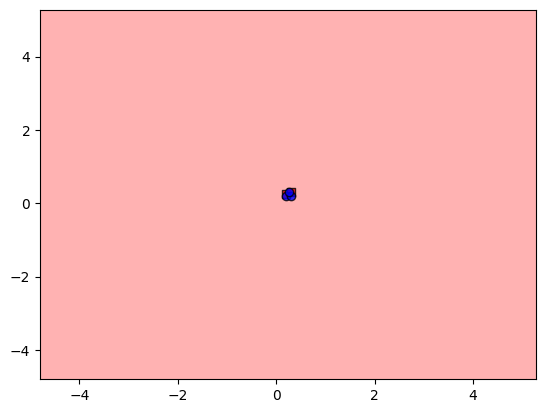

In [83]:
plot_decision_regions(X, y, model_scikit)



### The LLM that I used for the Q-3 is for creating data set.


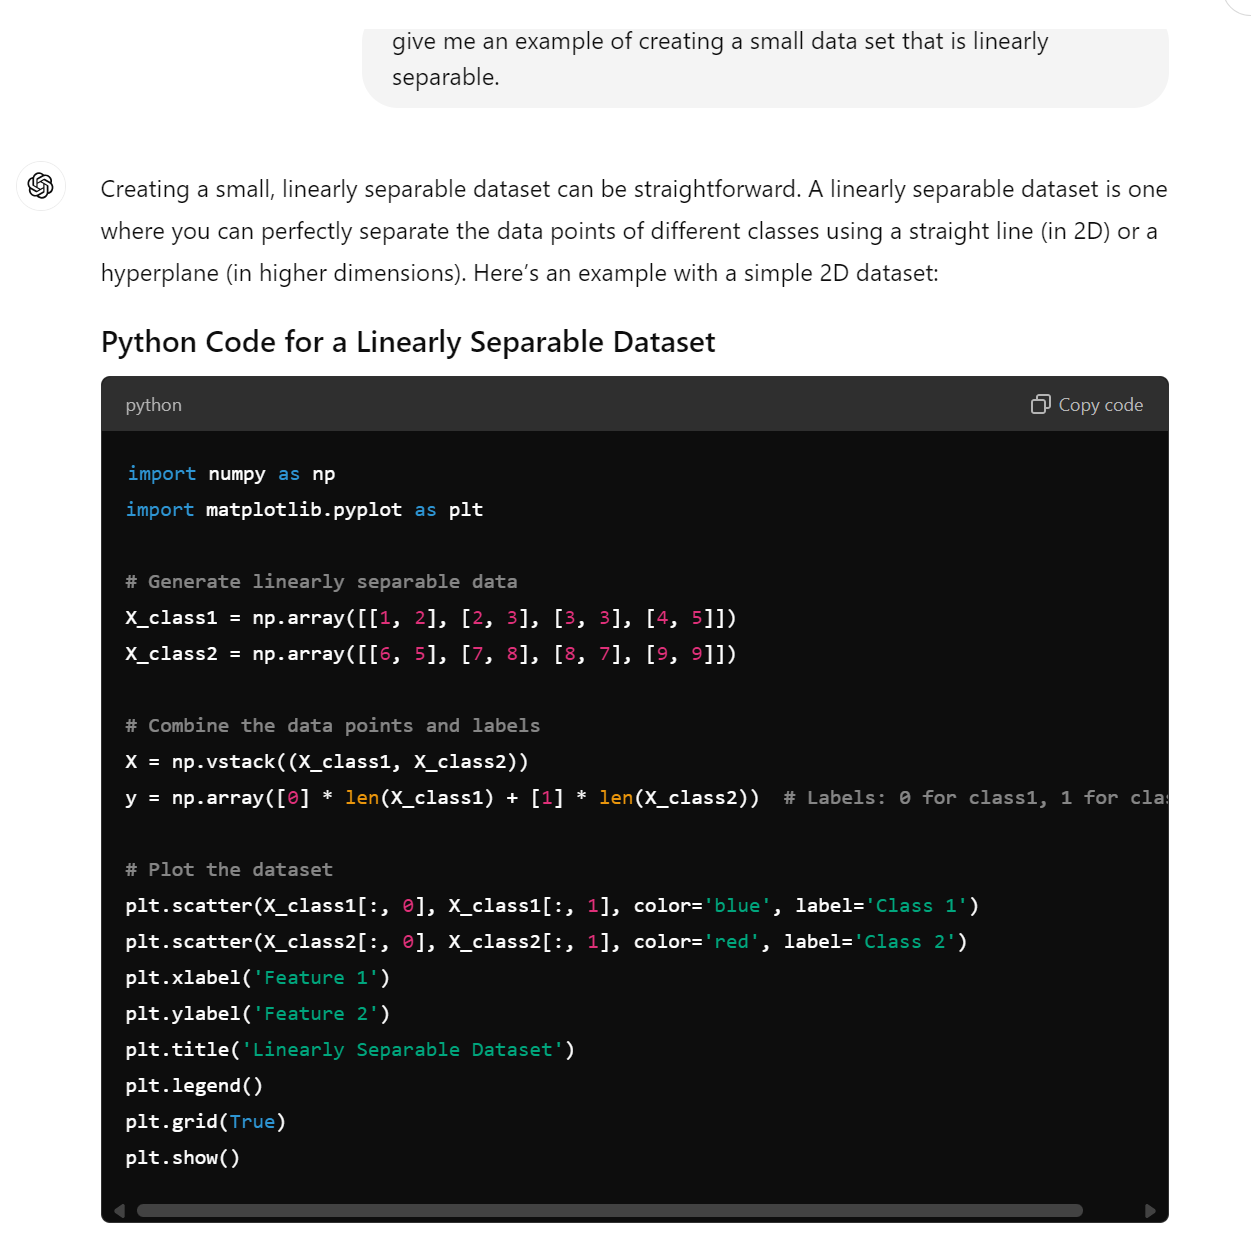

In [ ]:
# Grader's area
maxScore = maxScore + 4

# M[3,4] =

In [84]:
### verifying  the iris dataset for Q4
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

X.shape, y.shape

((100, 2), (100,))

In [85]:
X[:10], y[:10]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4],
        [5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]))

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVC and classification margin**  </font>

The Iris dataset defined in the above cells is linearly separable.

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization (that is, incentivizes very small slacks).

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$: let $s = \|w\|_2$.
[Hint: Read the documentation in order to access the coefficients.]

<font color = 'blue'> **Q4-3.** </font> Set $w \leftarrow w/s$ and $b\leftarrow b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T + b$ for each point $x$ in our dataset. This will give a range of values; let $\gamma$ be the smallest of these in absolute value. This $\gamma$ is the margin. (In fact, there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T + b = \gamma$ and $wx_1^T + b = -\gamma$.)


**Note:** as with anything else, feel free to discuss this on Canvas.

In [86]:
# Q4-1
from sklearn.svm import LinearSVC
model_Q4_1 = LinearSVC( C=10)
model_Q4_1.fit(X, y)

# https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.svm.LinearSVC.html from the link: C is Regularization parameter. The strength of the regularization is inversely proportional to C.
# The larger C means less regularization. In the question, it asks for reducing the regularization. C is default by 1 and always positive. I choose 10 for this case to less regularization.

LinearSVC(C=10)

In [87]:
# Q4-2

#from the documentation: coef_ is ndarray of shape (1, n_features)  and intercept is ndarray of shape (1,)
w_Q4 = model_Q4_1.coef_
b_Q4 = model_Q4_1.intercept_
print(w_Q4)
print(b_Q4)

[[-0.84224847  1.83293232]]
[-0.31371764]


In [88]:
# the 2-norm of w:

s = np.linalg.norm(w_Q4)
print(s)

2.0171820385197803


In [89]:
# Q4-3

# setting w = w/s and b = b/s
w_set = w_Q4 / s
b_set = b_Q4 / s
print(w_set)
print(b_set)

[[-0.41753716  0.90865985]]
[-0.15552272]


In [92]:
# Q4-4

#calculating  wxT+b  for each point  x  in our dataset
new_w_Q4_and_b_Q4 =  np.dot(X, w_set.T) + b_set
print(w_set.shape, X.shape)
print(new_w_Q4_and_b_Q4[:3])


# to find the smallest value which is the margin y:
margin = np.min(np.abs(new_w_Q4_and_b_Q4))
print(f"margin is: {margin}")

(1, 2) (100, 2)
[[-1.01283847]
 [-0.92933104]
 [-0.93668959]]
margin is: 0.4332473977509814


The LLM is used for the assigning a hyperparameter for LinearSVC. I utulizez these articles:

https://medium.com/@manoj.pillai/understanding-vector-norms-af40e2a7f7ea#:~:text=The%20L2%20norm,%20also%20known%20as%20the%20%E2%80%9CEuclidean%20norm,%E2%80%9D%20is


https://medium.com/@nigelgebodh/a-guide-to-vector-norms-in-machine-learning-with-python-35000796da9c#:~:text=L%E2%82%82%20Norm%20(Euclidean%20Norm)%20The%20L%E2%82%82%20norm%20or%20%E2%84%93%E2%82%82,%20also

https://medium.com/@guptasaurav/is-l2-norm-euclidean-distance-a9c04be0b3ca#:~:text=Vector%20Norm%20using%20Euclidean%20distance%20is%20also%20called%20L2-Norm.%20Similarly,



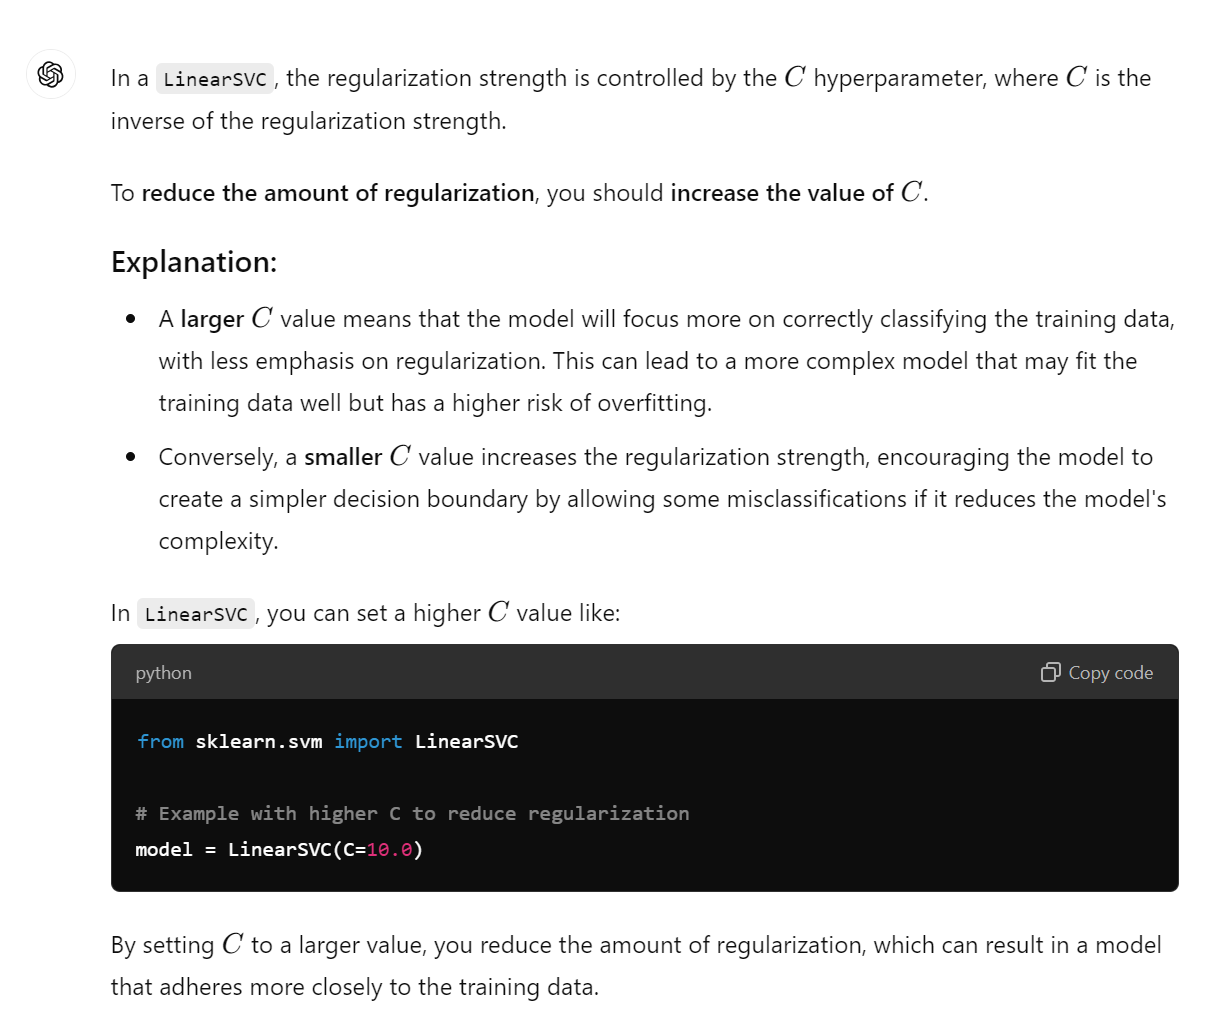


In [ ]:
# Grader's area

maxScore = maxScore + 16
#M[4,1] =
#M[4,2] =
#M[4,3] =
#M[4,4] =


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 5. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use the margin $\gamma$ as calculated in Question 4. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it. (Feel free to share your calculated value of $\gamma$ on Canvas, or to ask your peers to share theirs.)

<font color = 'blue'> **Q5-1.** </font> Calculate $R = \max_{x\in X} \|x\|_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm.

<font color = 'blue'> **Q5-2.** </font> Calculate $\mathit{maxErrors} = R/\gamma^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences.

<font color = 'blue'> **Q5-3.** </font> Compare $\mathit{maxErrors}$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from Assignment 2, or anything else that can provide you with that number].  


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# your answers go here

In [94]:
# Q5-1
R = np.max(np.linalg.norm(X, axis=1))  # 2-norm of all points
print("Maximum 2-norm (R):", R)



Maximum 2-norm (R): 8.462860036654275


In [95]:
# Q5-2

maxErrors = R / (margin ** 2)
print("Maximum number of errors:", maxErrors)

Maximum number of errors: 45.086366043553916


In [96]:
# Q5-3

# This is the perceptron class from Assignment 2 which the professor provided.

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    iter_trained : int
      The number of iterations it took for training.

    """
    def __init__(self, n_iter=50, random_state=1):
        self.n_iter = n_iter
        self.random_state = random_state
        self.iter_trained = -1

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.predict(xi) - target
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            ###### New code for doing nothing. - MEH
            this_code_does_nothing = True
            ######

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [98]:
# Q5-3 continuing......

perceptron_model = Perceptron(n_iter=50, random_state=1)
perceptron_model.fit(X, y)

predictions = perceptron_model.predict(X)
perceptron_errors = np.sum(predictions != y)
print(f"Number of errors by the perceptron: {perceptron_errors}")

Number of errors by the perceptron: 50


In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[5,1] =
#M[5,2] =
#M[5,3] =



----------------------------
----------------------------
----------------------------

In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore